In [1]:
import sys
from typing import Tuple
from typing import List
from typing import Generator

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from common import get_grid
from common import LIST_CYCLE_POSITION_SHIFT
from common import Grid
from solution_bfs_bounded import bfs_spiral_add_numbers_to_grid_bounded
from solution_bfs_unbounded import bfs_spiral_add_numbers_to_grid_unbounded

from utility import GridRecordable

# np.set_printoptions(threshold=sys.maxsize)
# np.set_printoptions(linewidth=sys.maxsize)

In [2]:
def display_solution(matrix, figsize=(10,10)):
    # Get the shape of the matrix
    num_rows, num_cols = matrix.shape

    # Create a meshgrid for X and Y
    np_array_x = np.arange(0, num_cols, 1)
    np_array_y = np.arange(0, num_rows, 1)
    np_array_2d_x, np_array_2d_y = np.meshgrid(np_array_x, np_array_y)

    # Create a 3D plot
    figure_1 = plt.figure(figsize=figsize)
    axes_1 = figure_1.add_subplot(111, projection='3d')

    # Add labels
    axes_1.set_xlabel('X-axis')
    axes_1.set_ylabel('Y-axis')
    axes_1.set_zlabel('Height')

    # Plot the 3D surface
    axes_1.plot_surface(np_array_2d_x, np_array_2d_y, matrix, cmap='viridis')
    
    ####################
    
    figure_2 = plt.figure(figsize=figsize)
    axes_2 = figure_2.add_subplot(111)
    
    image = axes_2.imshow(matrix, cmap='viridis', origin='lower')
    colorbar = figure_2.colorbar(image, ax=axes_2)  # Add colorbar to the subplot

    axes_2.set_title('Height Matrix')
    axes_2.set_xlabel('X-axis')
    axes_2.set_ylabel('Y-axis')
    
    ####################
    
    # Calculate the gradient using np.gradient
    gradient_y, gradient_x = np.gradient(matrix)

    # Create a vector field
    vector_field_x = -gradient_x
    vector_field_y = -gradient_y
    
    figure_3 = plt.figure(figsize=figsize)
    axes_3 = figure_3.add_subplot(111)

    axes_3.quiver(vector_field_x, vector_field_y, scale=20, scale_units='xy', angles='xy')
    axes_3.set_title('Vector Field (Gradient)')
    axes_3.set_xlabel('X-axis')
    axes_3.set_ylabel('Y-axis')

        

In [3]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def get_animation(list_matrix: List[np.ndarray]) -> FuncAnimation:
    """
    
    Notes:
        Do not use a generator to pull a matrix from list_matrix because
        the generator will throw a StopInteration because update(index_frame) 
        will be called multiple times which will be more than the side of the generator.
        Instead, use the index_frame in the update function to get the correct matrix based on index.
    
    Reference:
        How do I close figure in matplotlib?
            Notes:
                Using 
                    from IPython.display import clear_output
                    clear_output()
                only clears html, not matplotlib figures
                
            Reference:
                https://stackoverflow.com/a/73665280
    
    """

    # Create a figure and axes
    figure = plt.figure(figsize=(10,10))
    axes = figure.add_subplot(111)
        
    # Function to update the plot for each frame
    def update(index_frame):
        axes.clear()

        matrix = list_matrix[index_frame]

        # Display the numbers in the matrix
        for i in range(matrix.shape[0]):
            for j in range(matrix.shape[1]):
                axes.text(j, i, f'{matrix[i, j]}', ha='center', va='center', color='white')
        
        axes.imshow(matrix, cmap='viridis')
        axes.set_title(f"Frame {index_frame}")

        # print(index_frame)
        # print(matrix)
        # print()
        
    # Create the animation
    animation = FuncAnimation(
        figure, 
        update, 
        frames=len(list_matrix), 
        interval=50,
    )

    # Clear the IPython (Jupyter) html
    # clear_output()
    
    # Close the figure created above because it will display the figure which is what you don't want, you want the animation.
    plt.close(figure)
    
    # The below does not work in a function. It only works ub jupyter cell where the line of code is on the global level and not in any code body.
    # HTML(animation.to_jshtml())  
    return animation

# Initial data

In [4]:
list_cycle_position_shift = LIST_CYCLE_POSITION_SHIFT

grid_size_x = 25
grid_size_y = 25

position_start: Tuple[int, int] = (15, 10)


# Solution 1 (BFS add numbers to grid but bounded by the grid)

In [5]:
# grid_1 = get_grid(grid_size_x, grid_size_y)
grid_1 = GridRecordable((grid_size_x, grid_size_y))

bfs_spiral_add_numbers_to_grid_bounded(
    grid_1, 
    position_start, 
    list_cycle_position_shift
)
    
matrix_1 = np.array(grid_1)
print(matrix_1)

[[625 600 552 506 462 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420]
 [624 599 551 505 461 400 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361]
 [623 598 550 504 460 399 342 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290]
 [622 597 549 503 459 398 341 272 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 291]
 [621 596 548 502 458 397 340 271 210 157 158 159 160 161 162 163 164 165 166 167 168 169 170 227 292]
 [620 595 547 501 457 396 339 270 209 156 111 112 113 114 115 116 117 118 119 120 121 122 171 228 293]
 [619 594 546 500 456 395 338 269 208 155 110  73  74  75  76  77  78  79  80  81  82 123 172 229 294]
 [618 593 545 499 455 394 337 268 207 154 109  72  43  44  45  46  47  48  49  50  83 124 173 230 295]
 [617 592 544 498 454 393 336 267 206 153 108  71  42  21  22  23  24  25  26  51  84 125 174 231 296]
 [616 591 543 497 453 392 335 266 205 152 107  70  41  20   7   8   9  10

In [6]:
list_matrix_1 = grid_1.get_list_matrix_recorded()
list_matrix_1 = list_matrix_1[:50]
animation_1 = get_animation(list_matrix_1)
HTML(animation_1.to_jshtml())

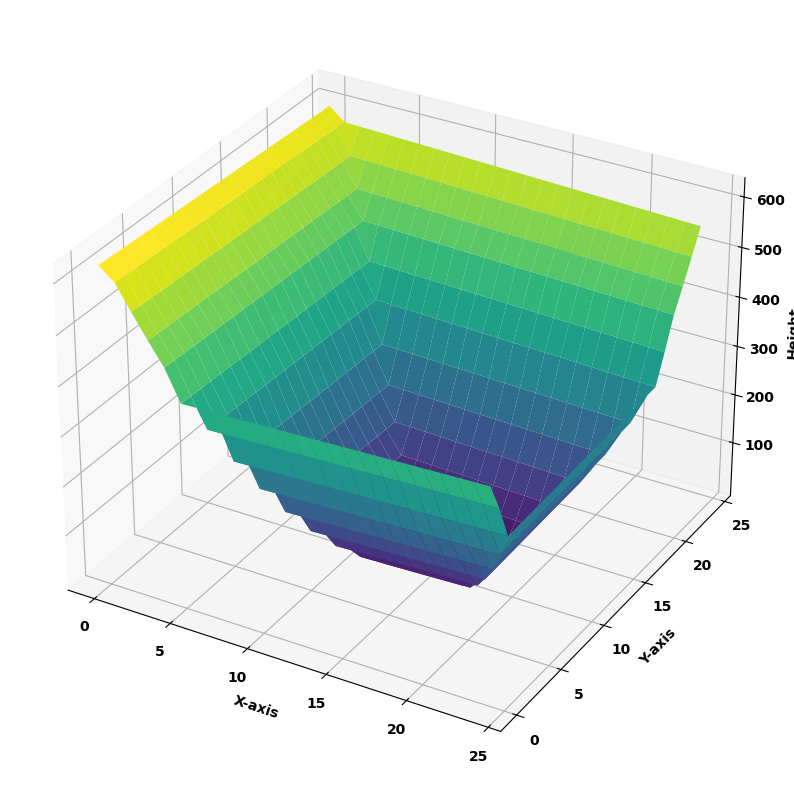

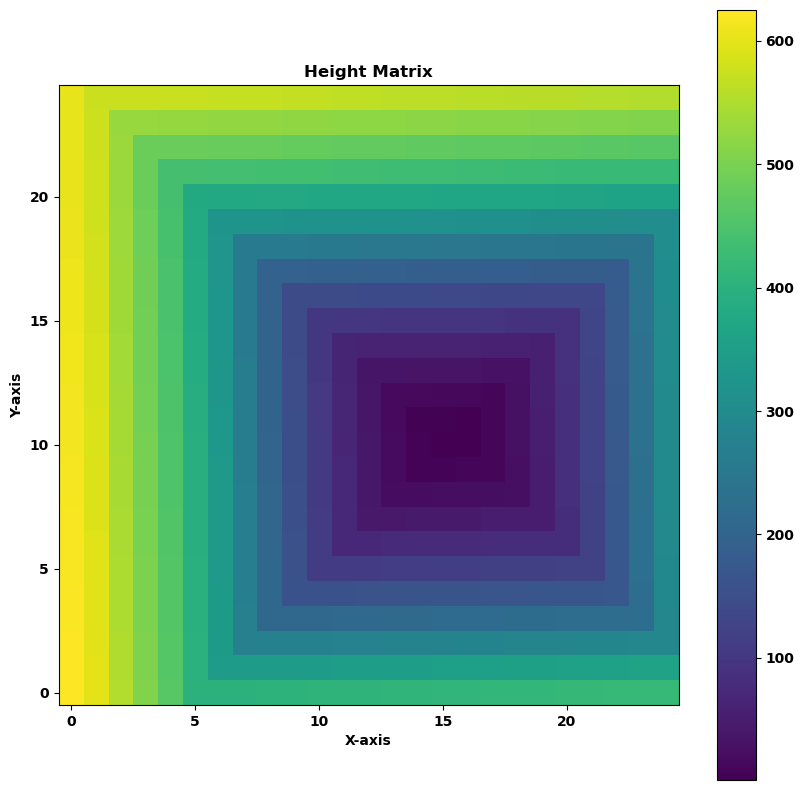

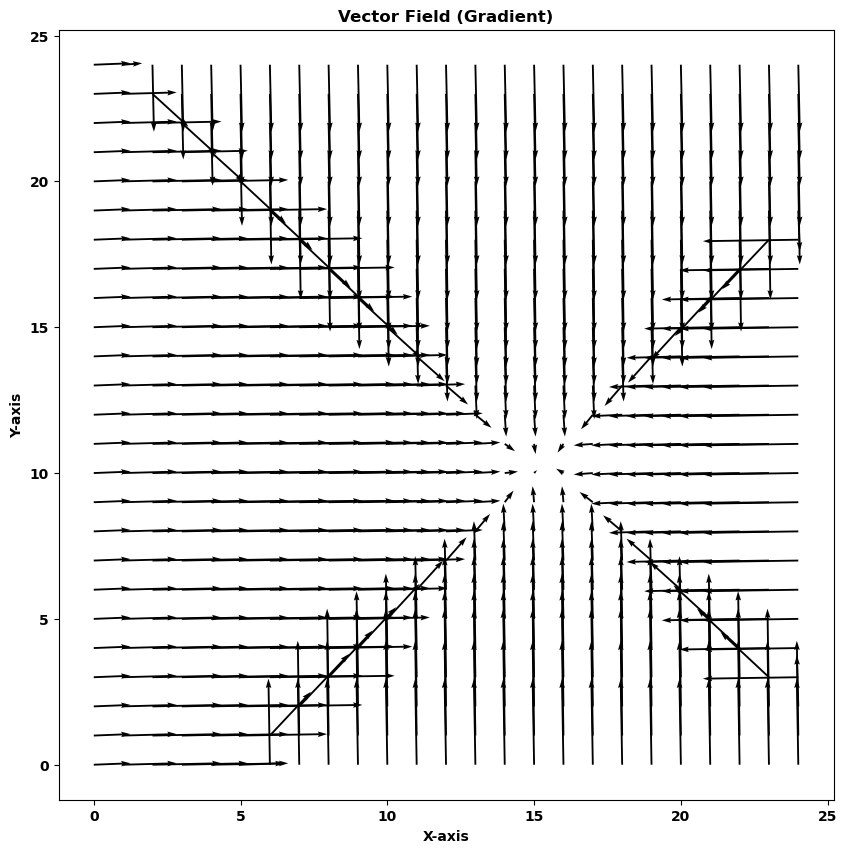

In [7]:
display_solution(matrix_1)

# Solution 2 (BFS add numbers to grid but not bounded by the grid)
Imagine the grid as a display like a monitor, the spiral is not dependent on your monitor's view to graph the correct values.
It's like in a video game where you can see half of an object because the other half is off screen and you know that the object is not messed up even when you can only see the visible part.

In [18]:
# grid_2 = get_grid(grid_size_x, grid_size_y)
grid_2 = GridRecordable((grid_size_x, grid_size_y))

number_of_valid_positions_on_grid = grid_size_x * grid_size_y

bfs_spiral_add_numbers_to_grid_unbounded(
    grid_2, 
    number_of_valid_positions_on_grid, 
    position_start, 
    list_cycle_position_shift
)

matrix_2 = np.array(grid_2)
print(matrix_2)

[[926 809 700 599 506 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440]
 [925 808 699 598 505 420 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361]
 [924 807 698 597 504 419 342 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290]
 [923 806 697 596 503 418 341 272 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 291]
 [922 805 696 595 502 417 340 271 210 157 158 159 160 161 162 163 164 165 166 167 168 169 170 227 292]
 [921 804 695 594 501 416 339 270 209 156 111 112 113 114 115 116 117 118 119 120 121 122 171 228 293]
 [920 803 694 593 500 415 338 269 208 155 110  73  74  75  76  77  78  79  80  81  82 123 172 229 294]
 [919 802 693 592 499 414 337 268 207 154 109  72  43  44  45  46  47  48  49  50  83 124 173 230 295]
 [918 801 692 591 498 413 336 267 206 153 108  71  42  21  22  23  24  25  26  51  84 125 174 231 296]
 [917 800 691 590 497 412 335 266 205 152 107  70  41  20   7   8   9  10

In [19]:
list_matrix_2 = grid_2.get_list_matrix_recorded()
list_matrix_2 = list_matrix_2[:50]
animation_2 = get_animation(list_matrix_2)
HTML(animation_2.to_jshtml())

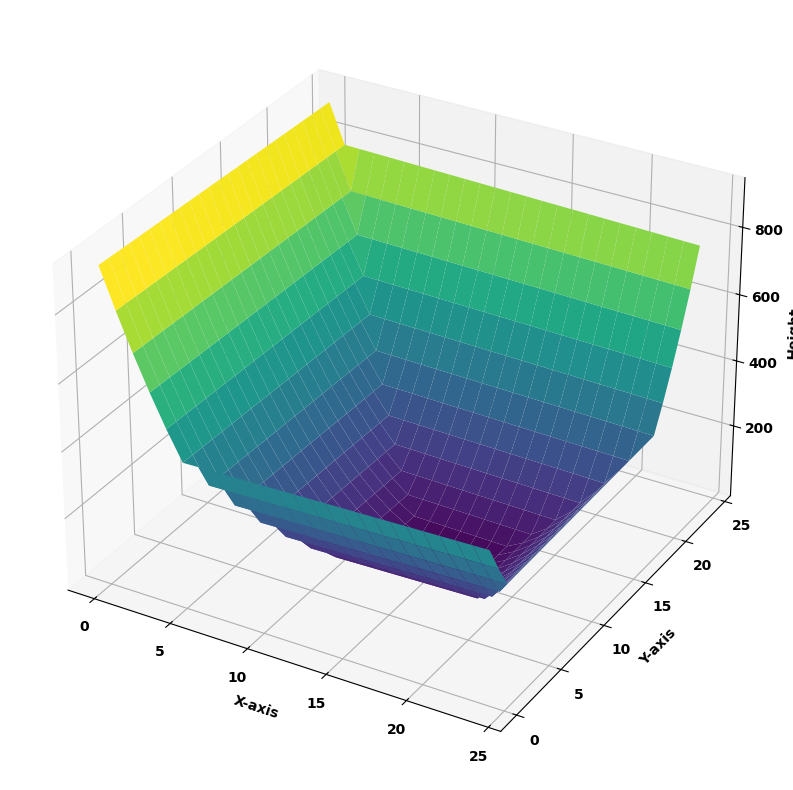

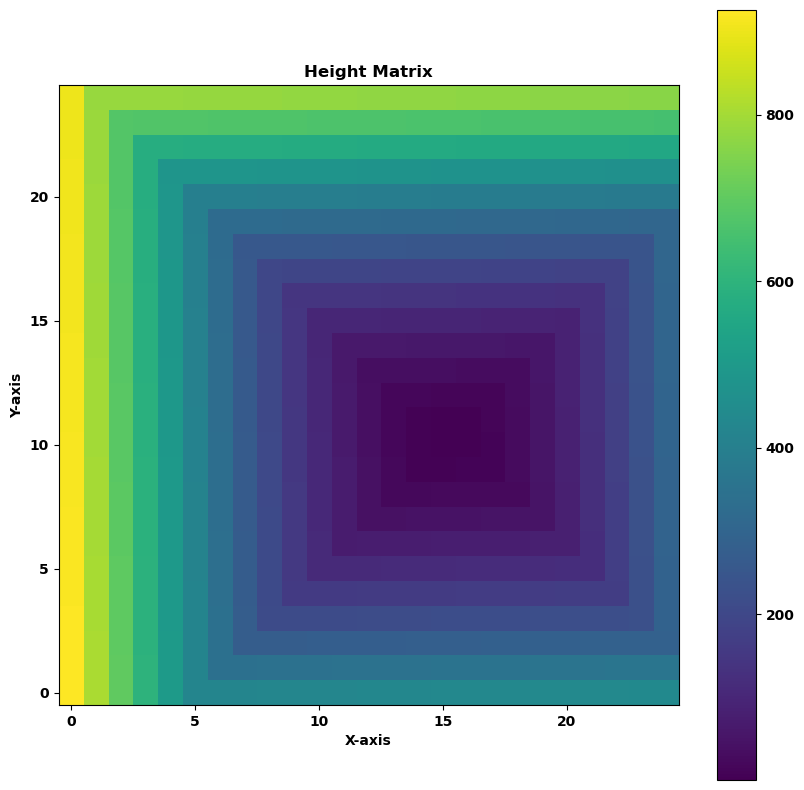

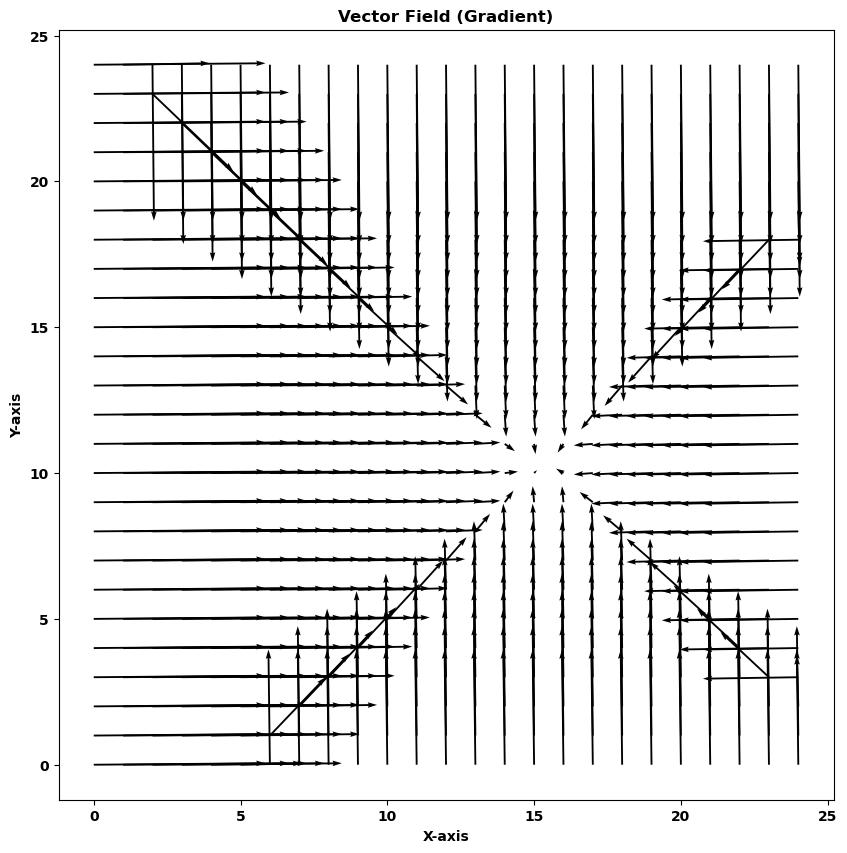

In [10]:
display_solution(matrix_2)

# Testing fun modifications

In [11]:
list_cycle_position_shift_custom = [
    (0, -1),  # Up
    (0, 1),  # Down
    (1, 0),  # Right
    (-1, 0),  # Left
    (1, -1),  # Up Right
    (-1, 1),  # Down Left
    (-1, -1),  # Up Left
    (1, 1),  # Down Right
]


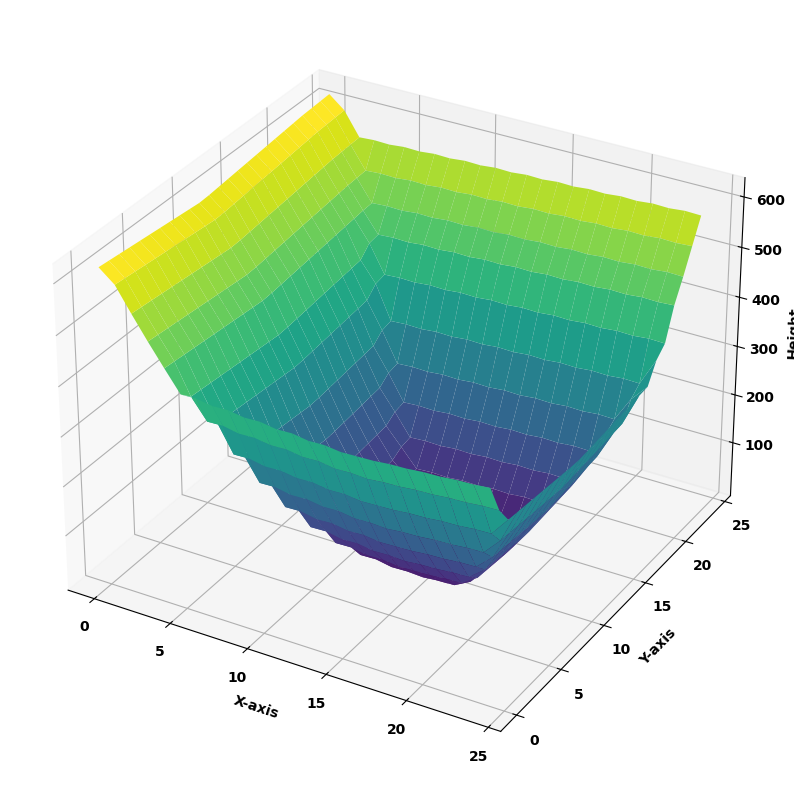

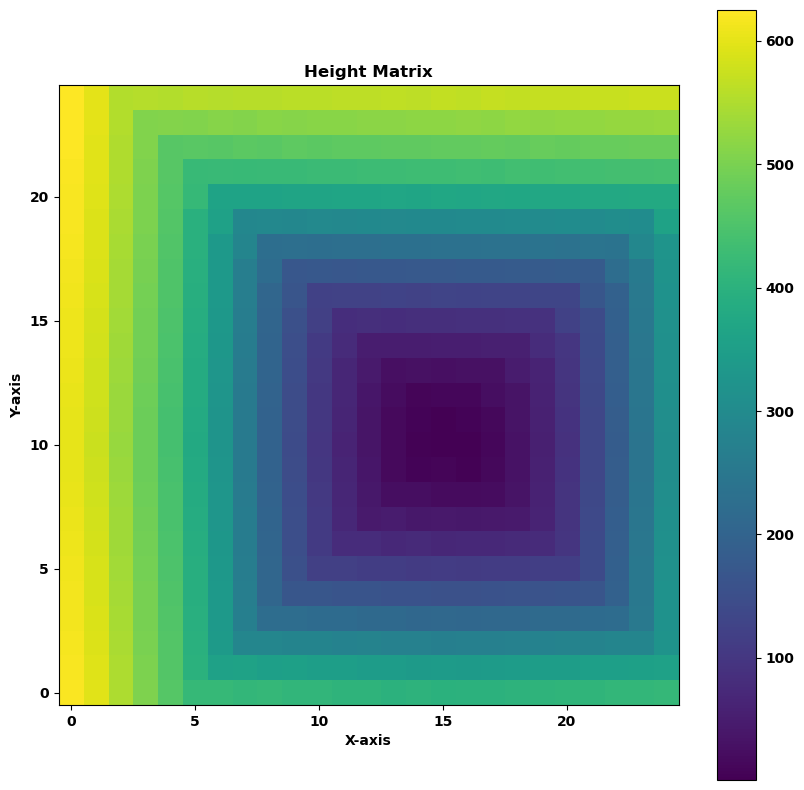

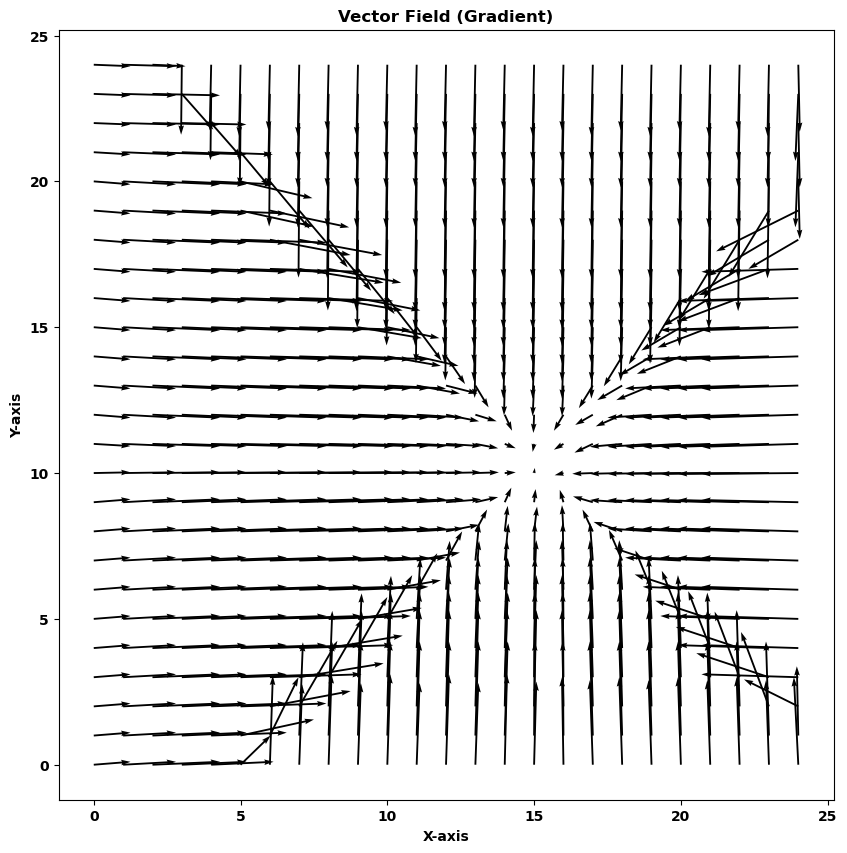

In [12]:
grid_3 = get_grid(grid_size_x, grid_size_y)

bfs_spiral_add_numbers_to_grid_bounded(
    grid_3, 
    position_start, 
    list_cycle_position_shift_custom
)

matrix_3 = np.array(grid_3)
display_solution((matrix_3))

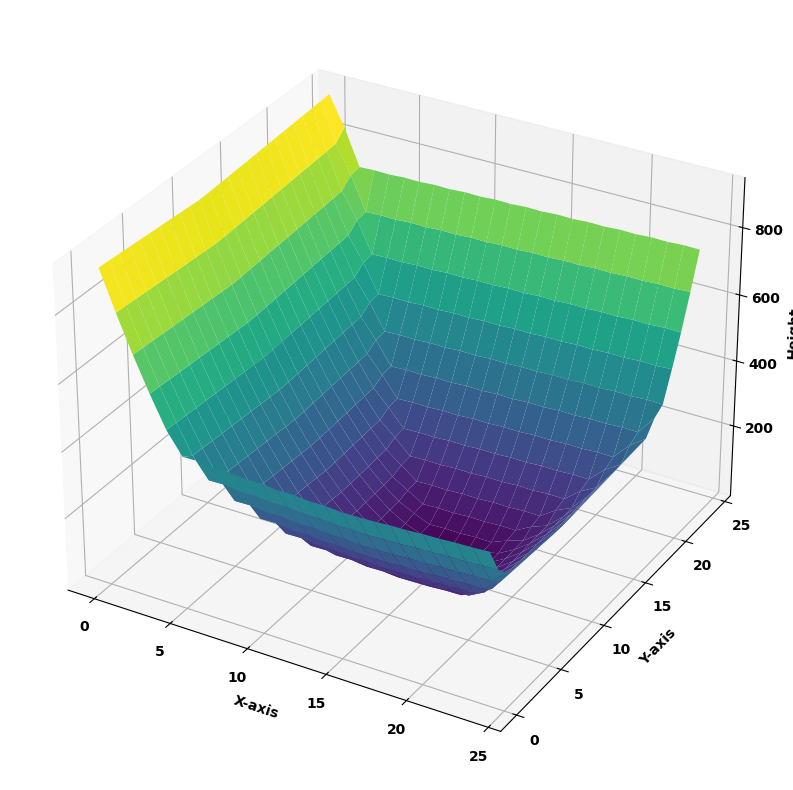

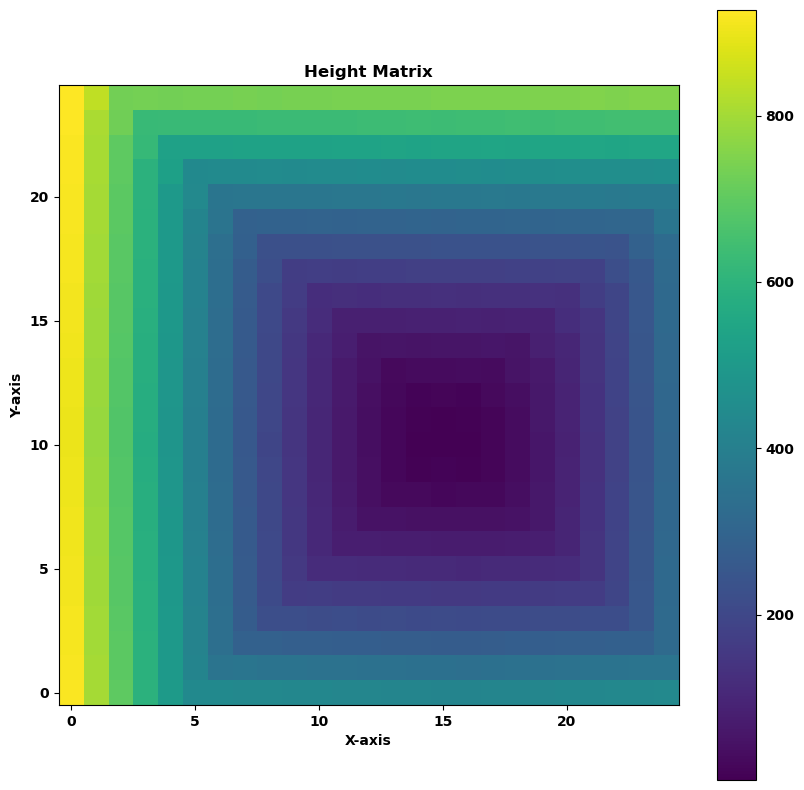

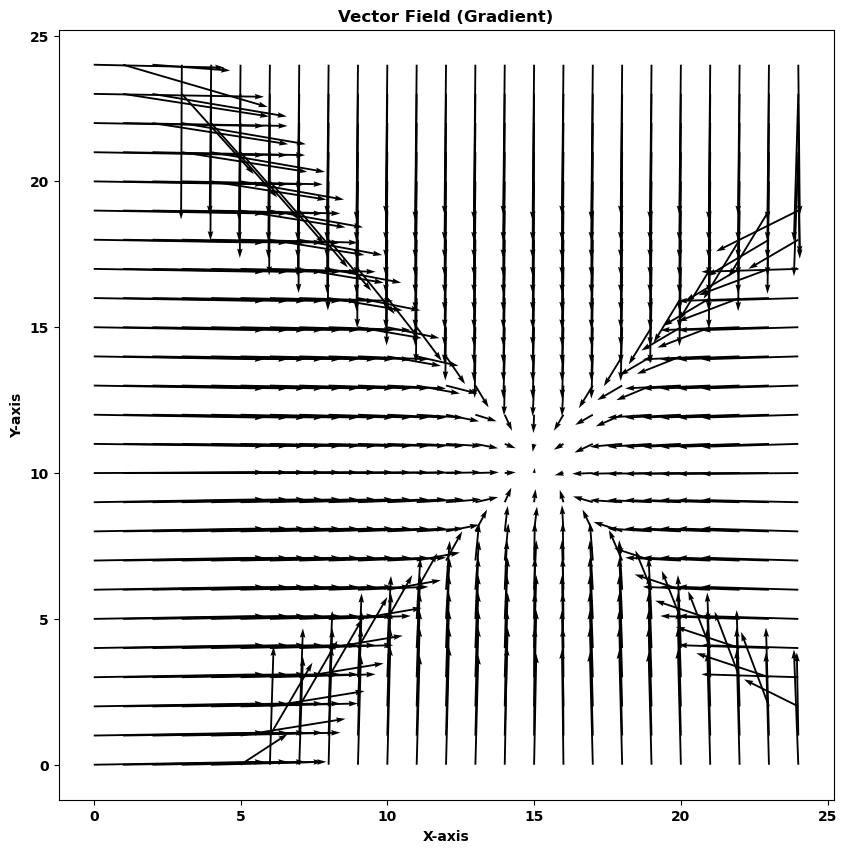

In [13]:
grid_4 = get_grid(grid_size_x, grid_size_y)

number_of_valid_positions_on_grid = grid_size_x * grid_size_y

bfs_spiral_add_numbers_to_grid_unbounded(
    grid_4, 
    number_of_valid_positions_on_grid, 
    position_start, 
    list_cycle_position_shift_custom
)

matrix_4 = np.array(grid_4)
display_solution((matrix_4))


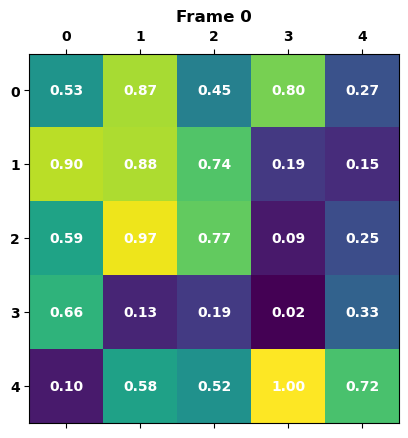

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create a figure and axes
fig, ax = plt.subplots()

# Function to update the plot for each frame
def update(frame):
    ax.clear()
    matrix = generate_matrix(frame)  # Replace with your function to generate the matrix for each frame
    
    # Display the numbers in the matrix
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center', color='white')

    ax.matshow(matrix, cmap='viridis')
    ax.set_title(f"Frame {frame}")

# Function to generate a matrix for each frame (replace this with your own logic)
def generate_matrix(frame):
    # Example: A matrix that changes with time
    return np.random.rand(5, 5) * (frame + 1)

# Set the number of frames (adjust as needed)
# num_frames = 625
num_frames = 10

# Create the animation
animation = FuncAnimation(fig, 
                          update, 
                          frames=num_frames, 
                        #   interval=500,
                          )

# Save the animation as a GIF 
# animation.save('matrix_animation.gif')


from IPython.display import HTML
HTML(animation.to_jshtml())

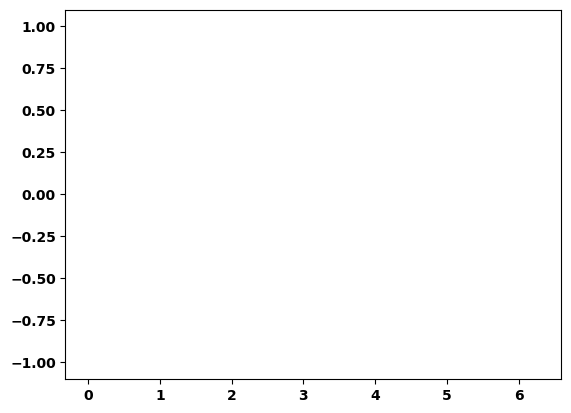

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
l, = ax.plot([0,2*np.pi],[-1,1])

animate = lambda i: l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

from IPython.display import HTML
HTML(ani.to_jshtml())

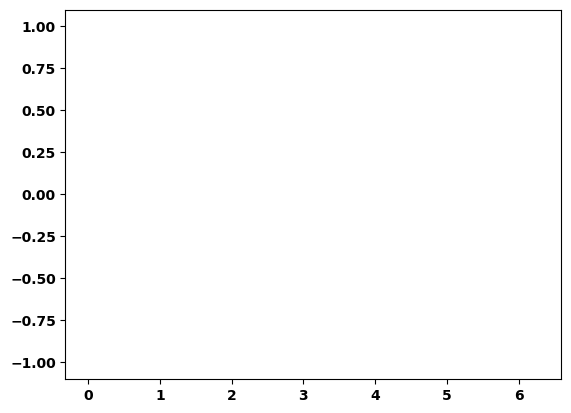

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
l, = ax.plot([0,2*np.pi],[-1,1])

animate = lambda i: l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))
ani

NameError: name 'a' is not defined

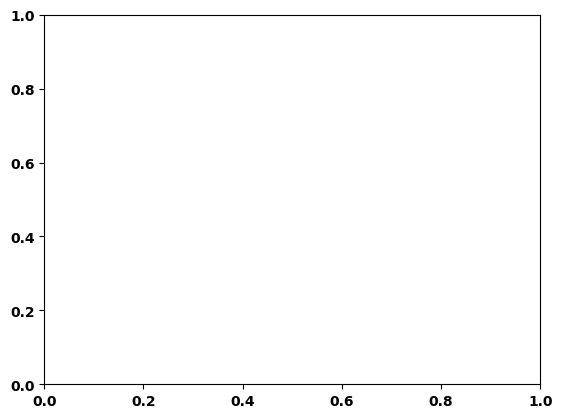

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import ArtistAnimation

# Create a figure and axes
fig, ax = plt.subplots()


# Function to generate a matrix for each frame (replace this with your own logic)
def generate_matrix( a):
    # Example: A matrix that changes with time
    # return np.random.rand(5, 5) * (frame + 1)
    for i in a:
        yield i 

b = generate_matrix(a)  

# Function to update the plot for each frame
def update(frame):
    ax.clear()
    matrix = next(b) # Replace with your function to generate the matrix for each frame
    
    # Display the numbers in the matrix
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, f'{matrix[i, j]:}', ha='center', va='center', color='white')

    ax.matshow(matrix, cmap='viridis')
    ax.set_title(f"Frame {frame}")



# Set the number of frames (adjust as needed)
# num_frames = 625
num_frames = 10 - 1

# Create the animation
animation = FuncAnimation(fig, 
                          func=update,
                          frames=num_frames, 
                        #   interval=500,
                          )

# Save the animation as a GIF 
# animation.save('matrix_animation.gif')


from IPython.display import HTML
HTML(animation.to_jshtml())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a sample matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Display the matrix using imshow
plt.imshow(matrix, cmap='viridis', interpolation='nearest')

# Add colorbar for reference
plt.colorbar()
from IPython.display import display, clear_output
clear_output()
# Show the plot
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

im = plt.imshow(np.random.randn(10,10))

def update(i):
    A = np.random.randn(10,10)
    im.set_array(A)
    return im

ani = FuncAnimation(plt.gcf(), update, frames=range(100), interval=5, blit=False)

plt.show()
HTML(ani.to_jshtml())